## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Importing the dataset, parsing the date and making it as the index col

In [ ]:
actual_data = pd.read_csv("D:/ISDC Work/Python Codes/NiftyNSEI.csv", parse_dates = ['Date'], index_col = 'Date')

In [ ]:
actual_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-22,10612.650391,10646.250000,10512.000000,10526.750000,10526.750000,239500.0
2018-11-26,10568.299805,10637.799805,10489.750000,10628.599609,10628.599609,0.0
2018-11-27,10621.450195,10695.150391,10596.349609,10685.599609,10685.599609,0.0
2018-11-28,10708.750000,10757.799805,10699.849609,10728.849609,10728.849609,424500.0
2018-11-29,10808.700195,10883.049805,10782.349609,10858.700195,10858.700195,691300.0


## Plotting the close column

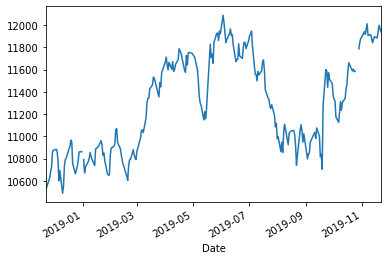

In [ ]:
actual_data['Close'].plot()

## Performing missing value imputation 
### Decomposition cannot be done if there are missing values present in the dataframe

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = "most_frequent")
df = imp.fit_transform(actual_data)
df

array([[ 10612.650391,  10646.25    ,  10512.      ,  10526.75    ,
         10526.75    , 239500.      ],
       [ 10568.299805,  10637.799805,  10489.75    ,  10628.599609,
         10628.599609,      0.      ],
       [ 10621.450195,  10695.150391,  10596.349609,  10685.599609,
         10685.599609,      0.      ],
       ...,
       [ 12004.75    ,  12038.599609,  11966.049805,  11999.099609,
         11999.099609,    600.      ],
       [ 12025.650391,  12028.200195,  11956.900391,  11968.400391,
         11968.400391,    600.      ],
       [ 11967.299805,  11968.099609,  11916.299805,  11940.799805,
         11940.799805,      0.      ]])

## Converting the obtained array into a dataframe

In [ ]:
final_df = pd.DataFrame(df, columns = {'Open': df[:, 0], 'High': df[:, 1], 'Low': df[:, 2], 
                                       'Close': df[:, 3], 'Adj Close': df[:, 4], 'Vol': df[:, 5]})
print("============================================================")
print(final_df.head())
print("============================================================")
print("printing the total null values present in dataframe to check")
print(final_df.isnull().sum())
print("============================================================")

           Open          High           Low         Close     Adj Close  \
0  10612.650391  10646.250000  10512.000000  10526.750000  10526.750000   
1  10568.299805  10637.799805  10489.750000  10628.599609  10628.599609   
2  10621.450195  10695.150391  10596.349609  10685.599609  10685.599609   
3  10708.750000  10757.799805  10699.849609  10728.849609  10728.849609   
4  10808.700195  10883.049805  10782.349609  10858.700195  10858.700195   

        Vol  
0  239500.0  
1       0.0  
2       0.0  
3  424500.0  
4  691300.0  
printing the total null values present in dataframe to check
Open         0
High         0
Low          0
Close        0
Adj Close    0
Vol          0
dtype: int64


## Adding the date column from actual df to imputed df

In [ ]:
final_df['Date'] = pd.DataFrame(actual_data.index)
final_df.head()

,Open,High,Low,Close,Adj Close,Vol,Date
0,10612.650391,10646.250000,10512.000000,10526.750000,10526.750000,239500.0,2018-11-22
1,10568.299805,10637.799805,10489.750000,10628.599609,10628.599609,0.0,2018-11-26
2,10621.450195,10695.150391,10596.349609,10685.599609,10685.599609,0.0,2018-11-27
3,10708.750000,10757.799805,10699.849609,10728.849609,10728.849609,424500.0,2018-11-28
4,10808.700195,10883.049805,10782.349609,10858.700195,10858.700195,691300.0,2018-11-29


## Converting the data column to index column

In [ ]:
final_df = final_df.set_index('Date')
final_df.head()

,Open,High,Low,Close,Adj Close,Vol
Date,,,,,,
2018-11-22,10612.650391,10646.250000,10512.000000,10526.750000,10526.750000,239500.0
2018-11-26,10568.299805,10637.799805,10489.750000,10628.599609,10628.599609,0.0
2018-11-27,10621.450195,10695.150391,10596.349609,10685.599609,10685.599609,0.0
2018-11-28,10708.750000,10757.799805,10699.849609,10728.849609,10728.849609,424500.0
2018-11-29,10808.700195,10883.049805,10782.349609,10858.700195,10858.700195,691300.0


In [ ]:
print(final_df.index)
close = final_df['Close']
print(close.head())

DatetimeIndex(['2018-11-22', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06',
               ...
               '2019-11-08', '2019-11-11', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22'],
              dtype='datetime64[ns]', name='Date', length=243, freq=None)
Date
2018-11-22    10526.750000
2018-11-26    10628.599609
2018-11-27    10685.599609
2018-11-28    10728.849609
2018-11-29    10858.700195
Name: Close, dtype: float64


In [ ]:
# period is for the daily (1), weekly (7), or yearly (365) decomposition
out_put1 = seasonal_decompose(close, model = "additive", period = 1)
out_put2 = seasonal_decompose(close, model = "multiplicative", period = 1)

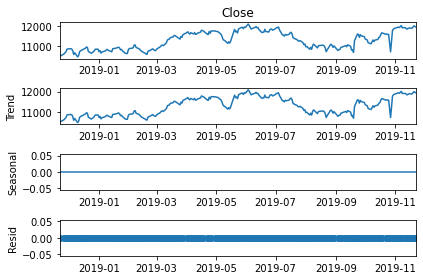

In [ ]:
out_put1.plot()
plt.show()

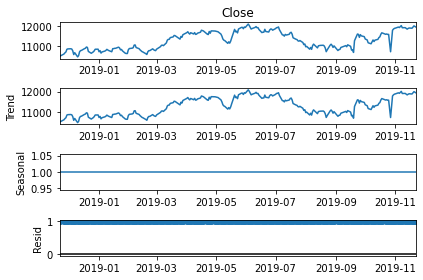

In [ ]:
out_put2.plot()
plt.show()

## <font color = 'red'> Additive Model: </font>
- y(t) = Trend + Seasonality + Cycle + Random Variation
- The model is linear where changes over time are made consistently by the same amount
- A linear trend is a straight line
- A linear seasonality has the same frequency(width of cycles) and amplitude (height of cycles)

## <font color = 'red'> Multiplicative Model: </font> 
- y(t) = Trend * Seasonality * Cycle * Random Variation
- The model is non-linear where changes increase or decrease over time. 
- A non-linear trend is a curve 
- A non-linear seasonality has an increasing or decreasing frequency/amplitude over time